# A Plot of $k_{obs}$ vs. $\%H_2SO_4$ or $H_0$

This code will create the figure 2 in the discussion that plots $k_{obs}$ vs. $\% H_2SO_4$ and $\log{k_{obs}}$ vs $0.62H_0$ 

In [62]:
##############################################################
### Set up libraries and global variables
##############################################################

import interpolators   ### import the following functions from local library
# interpolators.MakeInterpolationFunctionForH0inH2SO4byPercentWt()
# interpolators.MakeInterpolationFunctionForH2OActivityinH2SO4byMoleFraction()
# interpolators.MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()
# interpolators.MakeInterpolationFunctionForDensityofH2SO4byPercentWt()

import pandas as pd
pd.options.mode.chained_assignment = None    # no warning message and no exception is raised

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.optimize import minimize_scalar


from statsmodels.nonparametric.smoothers_lowess import lowess     # A function for interpolating a plot using the locally weighed scatterplot smoothing method. Returns smoothed x,y points
from scipy.interpolate import CubicSpline                         # A function for interpolating a plot using the cubic spline method. Returns an interpolation function.
from scipy.interpolate import interp1d                            # A function for interpolating a plot using the connect-the-dots method. Returns an interpolation function.
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

from matplotlib.patches import PathPatch
from matplotlib.path import Path


#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

molwtH2SO4 = 98.08
molwtH2O = 18.0
densityH2SO4 = 1.83
densityH2O = 1.000


In [63]:
##############################################################
### DATAFRAME for ESTER HYDROLYSIS KINETIC DATA
##############################################################

##############################################################
### Import the data and perform calculations
##############################################################

Data_File_Name = "Yates_Table1.csv"

Filename = github_location + Data_File_Name

df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 
#display(df)

df1 = (df.loc[df['Ester'] == 'MeOAc'])   ### Select only the MeOAc data

##############################################################
### Perform calculations
##############################################################

df1["kobs"] = df1["kobs"] * 1E-2 * 60    # convert from 10^-2 min^-1 to s^-1
#df1["kobs"] = df1["kobs"]

PercentH2SO4 = df1["%H2SO4"]
molesH2SO4 = PercentH2SO4 / molwtH2SO4
PercentH2O = 100 - PercentH2SO4
molesH2O = PercentH2O / molwtH2O
total_moles = molesH2SO4 + molesH2O
mole_fraction_H2SO4 = molesH2SO4 / total_moles

df1["X_H2SO4"] = mole_fraction_H2SO4

interpolatorH0 = interpolators.MakeInterpolationFunctionForH0inH2SO4byPercentWt()
df1["H0"] = interpolatorH0(PercentH2SO4)

m = 0.62
df1["HS"] = df1["H0"] * m

df1["log_k_obs"] = np.log10(df1["kobs"])

interpolator_aH2O = interpolators.MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()
df1["aH2O"] = interpolator_aH2O(PercentH2SO4)

interpolator_density = interpolators.MakeInterpolationFunctionForDensityofH2SO4byPercentWt()
density = interpolator_density(PercentH2SO4)

volume = 1000
gramsH2O = volume * density * PercentH2O/100
molesH2O = gramsH2O / molwtH2O    # per liter

df1["Molar_H2O"] = molesH2O
df1["Molar_aH2O"] = df1["aH2O"]/(1-df1["X_H2SO4"])*df1["Molar_H2O"]

display(df1)

,Ester,%H2SO4,kobs,X_H2SO4,H0,HS,log_k_obs,aH2O,Molar_H2O,Molar_aH2O
0,MeOAc,14.1,0.9000,0.029243,-0.597414,-0.370397,-0.045757,0.929987,52.275952,50.080484
1,MeOAc,20.7,1.5660,0.045716,-1.040195,-0.644921,0.194792,0.873649,50.434878,46.173255
2,MeOAc,28.3,2.5320,0.067544,-1.509841,-0.936101,0.403464,0.778187,47.988050,40.048746
3,MeOAc,34.8,3.8460,0.089215,-2.000013,-1.240008,0.585009,0.669057,45.575514,33.479526
4,MeOAc,40.4,4.8840,0.110638,-2.419997,-1.500398,0.688776,0.556795,43.253469,27.079348
5,MeOAc,45.4,6.2400,0.132397,-2.794364,-1.732506,0.795185,0.449615,40.989529,21.241846
6,MeOAc,50.2,6.8400,0.156117,-3.232965,-2.004438,0.835056,0.346623,38.651768,15.876097
7,MeOAc,55.2,7.9800,0.184424,-3.780673,-2.344017,0.902003,0.246010,36.023445,10.866097
8,MeOAc,60.4,8.2800,0.218701,-4.399864,-2.727916,0.918030,0.156488,33.057372,6.621126
9,MeOAc,65.2,7.1400,0.255866,-4.997463,-3.098427,0.853698,0.090901,30.074061,3.673729


LinregressResult(slope=1.7526232378003248, intercept=-3.310915195551209, rvalue=0.9991610733457754, pvalue=1.2789101339872816e-16, stderr=0.021659209750999234, intercept_stderr=0.025825131326416156)


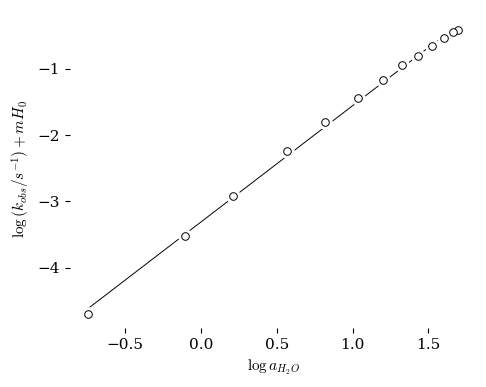

In [64]:
###################################################
### MAKE PLOT
###################################################

pKa = -7.2
Ka = 10**-pKa

h_0 = 10**-df1["H0"]

m = 0.62

###################################################
### Select the data for ESTER HYDROLYSIS
###################################################

#x = np.log10(df1["aH2O"])
x = np.log10(df1["Molar_aH2O"])



#y = df1["log_k_obs"]
#y = df1["log_k_obs"]-np.log10(h_0**m)
#y = df1["log_k_obs"]-np.log10(h_0**m/(Ka**m + h_0**m))

y = df1["log_k_obs"] + m * df1["H0"]




###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
#ax2 = ax.twinx()

###################################################
### Set up labels
###################################################

#x_label = "$\%wt {H_2SO_4}$"
x_label = "$\log{a_{H_2O}}$"

y_label = "$\log{(k_{obs} / {s}^{-1})} + mH_0$"

###################################################
### RATE vs ACIDITY Plot
###################################################

if True:                  # Set up axes for main plot
    ax.set(ylabel=y_label, xlabel=x_label,
#           xlim=[0,-5],
#           ylim=[0,-5]
           )

if True:                       # Data points for kobs vs Acidity
    ax.scatter(x, y, 
              marker = "o", s = 30, 
              color = "white", edgecolors = "black", linewidths=0.7, 
              zorder = 2)
    ax.scatter(x, y,           # White circle behind each data point 
              marker = "o", s = 90, 
              color = "white", 
              zorder = 1)


a = linregress(x,y)
print(a)
y_line = a.slope * x + a.intercept

ax.plot(x, y_line,    # Plot line fit
        "-", color = "black", linewidth=0.7, 
        zorder = 0)

plt.savefig("fig3.pdf")
plt.show()


#print(np.log(df1["Molar_aH2O"]))


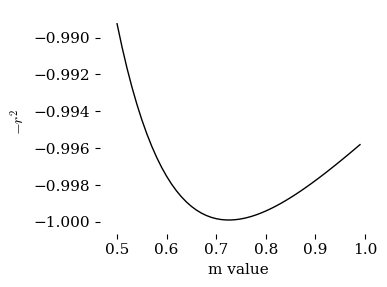

The optimal value for r is 0.725 for rsq = -0.99990
[ 0.5 -5. ]
LinregressResult(slope=2.016523660387124, intercept=-3.9125858355166647, rvalue=0.9999491596066763, pvalue=2.5772630828297844e-23, stderr=0.006131164782510899, intercept_stderr=0.0073104299516253985)


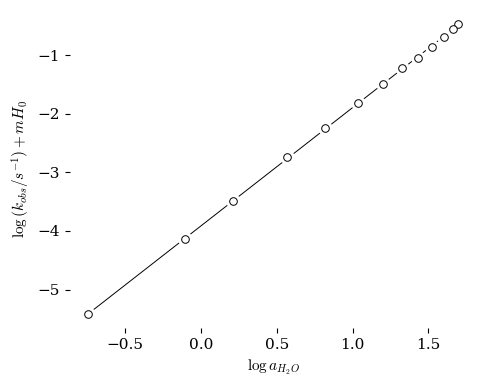

In [70]:
###################################################
### CURVE FIT FOR PARAMETERS
###################################################

# Try to curve fit for m, pKa and maybe n


def RSQ_function(m):    # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    h_0 = 10**-df1["H0"]
    x = np.log10(df1["Molar_aH2O"]) 
    y = df1["log_k_obs"]+ m * df1["H0"]
    linfit = linregress(x,y)
    return -(linfit.rvalue**2)

def RSQ_function2(m):    # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    pKa = -7
    h_0 = 10**-df1["H0"]
    Ka = 10**-pKa
    x = np.log10(df1["Molar_aH2O"]) 
    y = df1["log_k_obs"]- np.log10(h_0**m/(Ka**m + h_0**m))
    linfit = linregress(x,y)
    return -(linfit.rvalue**2)

##########################################################
### Plot the value of -RSQ as the value of r is varied ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
ax.set(ylabel=r"$-r^2$", 
       xlabel=r"m value")

rsq_range=[]
r_range = np.arange(0.5,1,0.01)
for r in r_range:
    rsq = RSQ_function(r)
    rsq_range.append(rsq)
    
ax.plot(r_range,rsq_range)

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()

##################################################
### Determine optimal r value to minimize -RSQ ###
##################################################

r_opt = minimize_scalar(RSQ_function)
print(f"The optimal value for r is {r_opt['x']:0.3f} for rsq = {r_opt['fun']:0.5f}")











###################################################
### MAKE PLOT
###################################################


def lineequation(x, m, pKa):
    h_0 = 10**-df1["H0"]
    Ka = 10**-pKa
    return (x - np.log10(h_0**m/(Ka**m + h_0**m)))/2

pKa = -7.2
Ka = 10**-pKa

h_0 = 10**-df1["H0"]

m = 0.72

###################################################
### Select the data for ESTER HYDROLYSIS
###################################################

#x = np.log10(df1["aH2O"])
#x = np.log10(df1["Molar_aH2O"])
x = np.log10(df1["Molar_aH2O"])



#y = df1["log_k_obs"]
#y = df1["log_k_obs"]-np.log10(h_0**m)
#y = df1["log_k_obs"]-np.log10(h_0**m/(Ka**m + h_0**m))

y = df1["log_k_obs"] + m * df1["H0"]

popt, pcov = curve_fit(lineequation, x, y, bounds =([0.5, -10],[1, -5]))
print(popt)

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
#ax2 = ax.twinx()

###################################################
### Set up labels
###################################################

#x_label = "$\%wt {H_2SO_4}$"
x_label = "$\log{a_{H_2O}}$"

y_label = "$\log{(k_{obs} / {s}^{-1})} + mH_0$"

###################################################
### RATE vs ACIDITY Plot
###################################################

if True:                  # Set up axes for main plot
    ax.set(ylabel=y_label, xlabel=x_label,
#           xlim=[0,-5],
#           ylim=[0,-5]
           )

if True:                       # Data points for kobs vs Acidity
    ax.scatter(x, y, 
              marker = "o", s = 30, 
              color = "white", edgecolors = "black", linewidths=0.7, 
              zorder = 2)
    ax.scatter(x, y,           # White circle behind each data point 
              marker = "o", s = 90, 
              color = "white", 
              zorder = 1)


a = linregress(x,y)
print(a)
y_line = a.slope * x + a.intercept

ax.plot(x, y_line,    # Plot line fit
        "-", color = "black", linewidth=0.7, 
        zorder = 0)

plt.savefig("fig3.pdf")
plt.show()


#print(np.log(df1["Molar_aH2O"]))
